work_year 	The year the salary was paid.

experience_level 	The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

employment_type 	The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance

job_title 	The role worked in during the year.

salary 	The total gross salary amount paid.

salary_currency 	The currency of the salary paid as an ISO 4217 currency code.

salary_in_usd 	The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence 	Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio 	The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially 
remote 100 Fully remote (more than 80%)

company_location 	The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size 	The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [20]:
df_cat = df.copy()

# dropping useless features
df_cat.drop(['salary', 'salary_currency', 'id'], axis=1, inplace=True)

# feature engineering
df_cat['job_title'] = df_cat['job_title'].apply(
    lambda x: x if x in ['Data Scientist', 'Machine Learning Scientist'] else 'Other')

df_regions = pd.read_csv('all.csv')


def get_region(r):
    return df_regions[df_regions['alpha-2'] == r].region.iloc[0]


df_cat['region'] = df_cat.company_location.apply(lambda x: get_region(x))

# dropping duplicate values
df_cat.drop_duplicates(inplace=True)

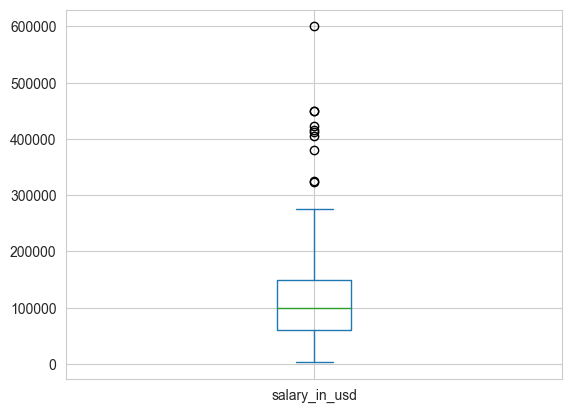

In [21]:
df_cat.salary_in_usd.plot.box()
plt.show()

In [22]:
# calculate IQR for column Height
Q1 = df_cat['salary_in_usd'].quantile(0.25)
Q3 = df_cat['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df_cat[(df_cat['salary_in_usd'] < Q1 - threshold * IQR) | (df_cat['salary_in_usd'] > Q3 + threshold * IQR)]

df_cat = df_cat.drop(outliers.index)

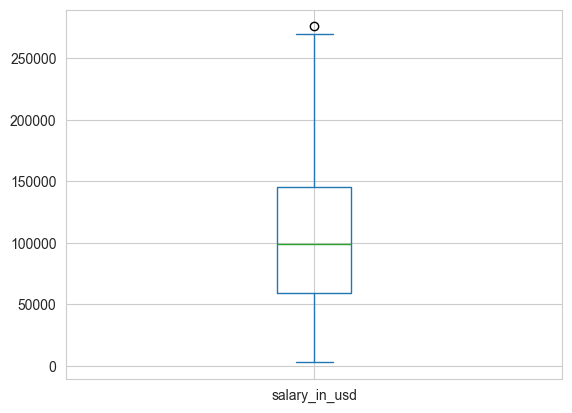

In [23]:
df_cat.salary_in_usd.plot.box()
plt.show()

In [24]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           540 non-null    int64 
 1   experience_level    540 non-null    object
 2   employment_type     540 non-null    object
 3   job_title           540 non-null    object
 4   salary_in_usd       540 non-null    int64 
 5   employee_residence  540 non-null    object
 6   remote_ratio        540 non-null    int64 
 7   company_location    540 non-null    object
 8   company_size        540 non-null    object
 9   region              540 non-null    object
dtypes: int64(3), object(7)
memory usage: 46.4+ KB


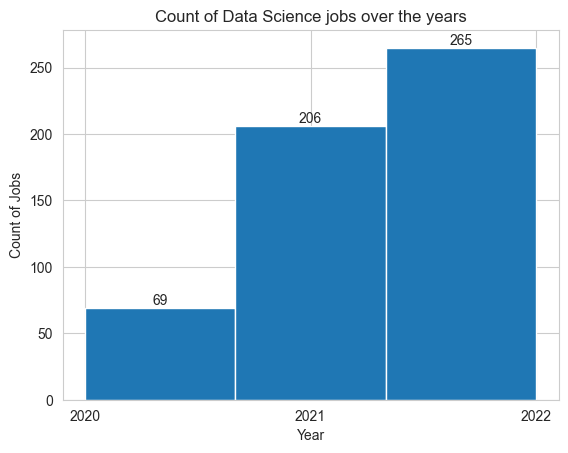

In [25]:
counts, edges, bars = plt.hist(df_cat.work_year.astype(str), bins=3)
plt.bar_label(bars)
plt.title('Count of Data Science jobs over the years')
plt.xlabel('Year')
plt.ylabel('Count of Jobs')
plt.show()

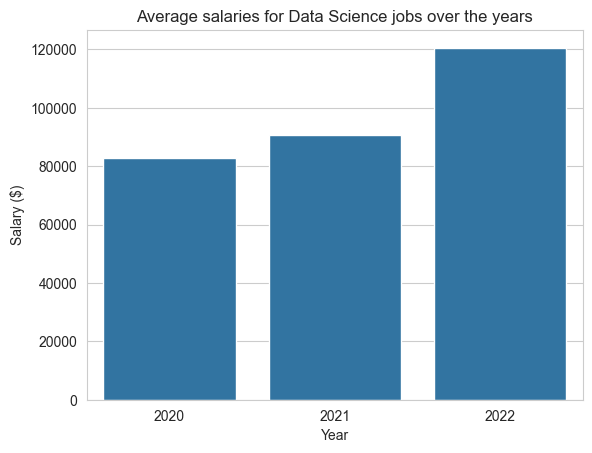

In [26]:
sns.barplot(x='work_year', y='salary_in_usd', data=df_cat, errorbar=('ci', False))
plt.title('Average salaries for Data Science jobs over the years')
plt.xlabel('Year')
plt.ylabel('Salary ($)')
plt.show()

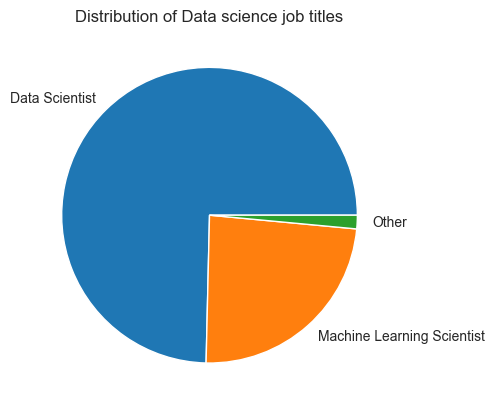

In [27]:
plt.pie(df_cat.job_title.value_counts(), labels=df_cat.job_title.unique())
plt.title('Distribution of Data science job titles')
plt.show()

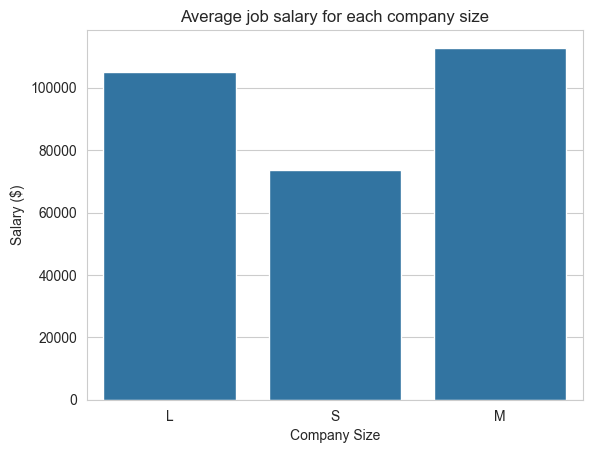

In [28]:
sns.barplot(x='company_size', y='salary_in_usd', data=df_cat, errorbar=('ci', False))
plt.title('Average job salary for each company size')
plt.xlabel('Company Size')
plt.ylabel('Salary ($)')
plt.show()

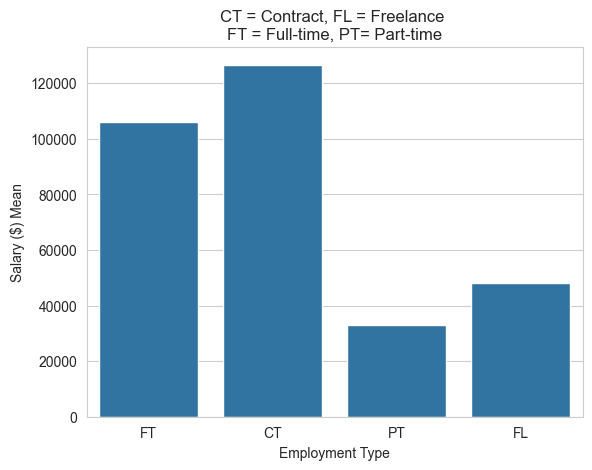

In [29]:
sns.barplot(x='employment_type', y='salary_in_usd', data=df_cat, errorbar=('ci', False))
plt.title('CT = Contract, FL = Freelance \nFT = Full-time, PT= Part-time')
plt.xlabel('Employment Type')
plt.ylabel('Salary ($) Mean')
plt.show()

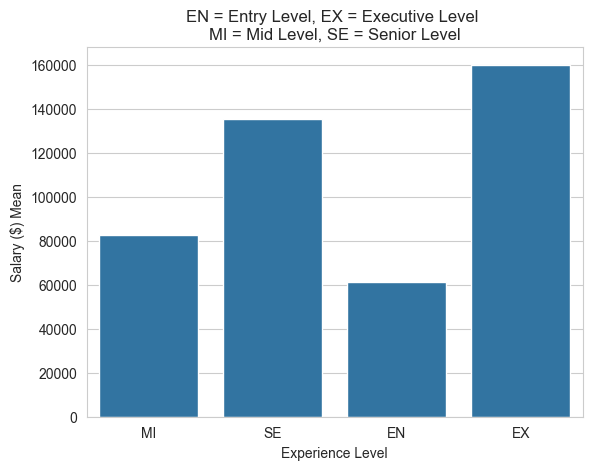

In [30]:
sns.barplot(x='experience_level', y='salary_in_usd', data=df_cat, errorbar=('ci', False))
plt.title('EN = Entry Level, EX = Executive Level \nMI = Mid Level, SE = Senior Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary ($) Mean')
plt.show()

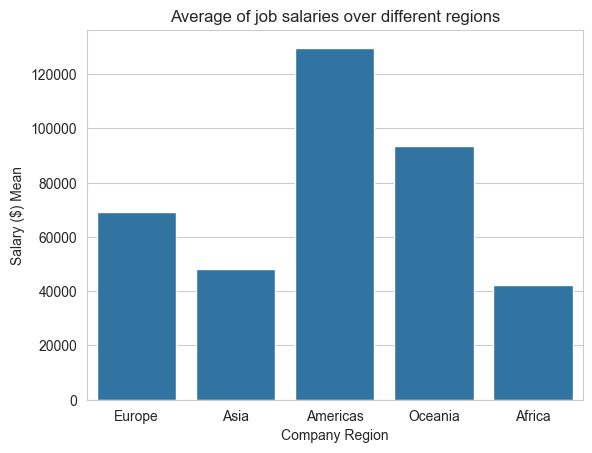

In [31]:
sns.barplot(x='region', y='salary_in_usd', data=df_cat, errorbar=('ci', False))
plt.title('Average of job salaries over different regions')
plt.xlabel('Company Region')
plt.ylabel('Salary ($) Mean')
plt.show()

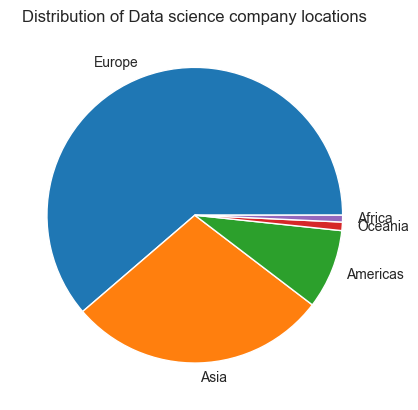

In [32]:
plt.pie(df_cat.region.value_counts(), labels=df_cat.region.unique())
plt.title('Distribution of Data science company locations')
plt.show()